In [1]:
import pandas as pd
import re

In [7]:
gs_url='https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166'
print(gs_url)
url=re.sub('edit#', 'export?format=xlsx&', gs_url)
print(url)
df = pd.read_excel(url)
df

https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166
https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/export?format=xlsx&gid=1108216166


,Timestamp,age (years),gender,satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall],skills,buying preferences [alpha],buying preferences [beta],buying preferences [gamma]
0,2021-03-09 07:28:24.801,21.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea
6,2021-03-11 07:59:04.920,44.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream"
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream"
8,2021-03-16 10:49:10.943,22.0,Male,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery"
9,2021-06-14 23:53:20.009,20.0,Male,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea


In [11]:
df.columns

Index(['Timestamp', 'age (years)', 'gender', 'satisfaction [product]',
       'satisfaction [price]', 'satisfaction [service]',
       'satisfaction [overall]', 'skills', 'buying preferences [alpha]',
       'buying preferences [beta]', 'buying preferences [gamma]'],
      dtype='object')

In [16]:
df.columns.str.replace(r'(satisfaction|buying preferences|\[|\])','',regex=True).str.strip()

Index(['Timestamp', 'age (years)', 'gender', 'product', 'price', 'service',
       'overall', 'skills', 'alpha', 'beta', 'gamma'],
      dtype='object')

In [15]:
df.columns=df.columns.str.replace(r'(satisfaction|buying preferences|\[|\])',''
                                  ,regex=True).str.strip()
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea
6,2021-03-11 07:59:04.920,44.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream"
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream"
8,2021-03-16 10:49:10.943,22.0,Male,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery"
9,2021-06-14 23:53:20.009,20.0,Male,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea


### record gender

In [17]:
d= {'Female':'F',
   'Male':'M',
   'Prefer not to say':'X'}
df.gender.map(d, na_action='ignore')

0      M
1      F
2      X
3      X
4      F
5    NaN
6      M
7    NaN
8      M
9      M
Name: gender, dtype: object

In [18]:
df.gender=df.gender.map(d, na_action='ignore')

In [19]:
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream"
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream"
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery"
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea


### Multiple choice grid

In [21]:
df['product'].map({'very dissatisfied':1,
   'dissatisfied':2,
   'neutral':3,
   'satisfied':4,
   'very satisfied':5},na_action='ignore')


0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
5    1.0
6    1.0
7    NaN
8    1.0
9    NaN
Name: product, dtype: float64

In [24]:
for c in ['product', 'price', 'service','overall']:
    df[f'{c}_n']=df[c].map({'very dissatisfied':1,
                                       'dissatisfied':2,
                                       'neutral':3,
                                       'satisfied':4,
                                       'very satisfied':5})


In [25]:
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1.0,2.0,3.0,5.0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2.0,3.0,4.0,5.0
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2.0,3.0,4.0,5.0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4.0,3.0,2.0,1.0
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4.0,4.0,5.0,5.0
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea,1.0,2.0,NaN,NaN
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream",1.0,2.0,3.0,5.0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream",NaN,NaN,NaN,NaN
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery",1.0,1.0,1.0,1.0
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    10 non-null     datetime64[ns]
 1   age (years)  9 non-null      float64       
 2   gender       8 non-null      object        
 3   product      8 non-null      object        
 4   price        8 non-null      object        
 5   service      7 non-null      object        
 6   overall      7 non-null      object        
 7   skills       8 non-null      object        
 8   alpha        10 non-null     object        
 9   beta         9 non-null      object        
 10  gamma        10 non-null     object        
 11  product_n    8 non-null      float64       
 12  price_n      8 non-null      float64       
 13  service_n    7 non-null      float64       
 14  overall_n    7 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 1.

### multi-value column

In [27]:
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1.0,2.0,3.0,5.0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2.0,3.0,4.0,5.0
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2.0,3.0,4.0,5.0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4.0,3.0,2.0,1.0
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4.0,4.0,5.0,5.0
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea,1.0,2.0,NaN,NaN
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream",1.0,2.0,3.0,5.0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream",NaN,NaN,NaN,NaN
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery",1.0,1.0,1.0,1.0
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea,NaN,NaN,NaN,NaN


In [28]:
dskills=df['skills'].str.get_dummies(',')
dskills

,Access,Excel,Java,PowerPoint,Python,R,SPSS,SQL,Excel,SQL,Word
0,0,1,0,1,1,1,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,1,1,0,0
3,1,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,1,1,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,1,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,1,1,1,0,1,0,0,1
9,0,0,1,0,1,0,0,0,0,1,0


In [29]:
df=pd.concat([df,dskills],axis=1).copy()
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,...,Excel,Java,PowerPoint,Python,R,SPSS,SQL,Excel,SQL,Word
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,...,1,0,1,1,1,0,1,0,0,1
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",...,1,0,1,0,0,1,0,0,0,1
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream",...,0,0,0,1,1,0,1,1,0,0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery",...,1,0,1,0,0,0,0,0,0,1
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,...,0,0,0,1,1,1,0,1,0,0
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,...,0,0,0,0,0,0,0,0,0,0
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery",...,0,0,0,0,1,0,1,1,0,0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,...,0,0,0,0,0,0,0,0,0,0
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery",...,1,0,1,1,1,0,1,0,0,1
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,...,0,1,0,1,0,0,0,0,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    10 non-null     datetime64[ns]
 1   age (years)  9 non-null      float64       
 2   gender       8 non-null      object        
 3   product      8 non-null      object        
 4   price        8 non-null      object        
 5   service      7 non-null      object        
 6   overall      7 non-null      object        
 7   skills       8 non-null      object        
 8   alpha        10 non-null     object        
 9   beta         9 non-null      object        
 10  gamma        10 non-null     object        
 11  product_n    8 non-null      float64       
 12  price_n      8 non-null      float64       
 13  service_n    7 non-null      float64       
 14  overall_n    7 non-null      float64       
 15   Access      10 non-null     int64         
 16   Excel     

In [35]:
df.loc[:, ['Excel', 'SQL', ' Python']].sum(axis=0)

Excel      3
SQL        1
 Python    5
dtype: int64

In [36]:
df.loc[:, ['Excel', 'SQL', ' Python']].sum(axis=1)

0    1
1    0
2    2
3    0
4    2
5    0
6    1
7    0
8    1
9    2
dtype: int64

<Axes: >

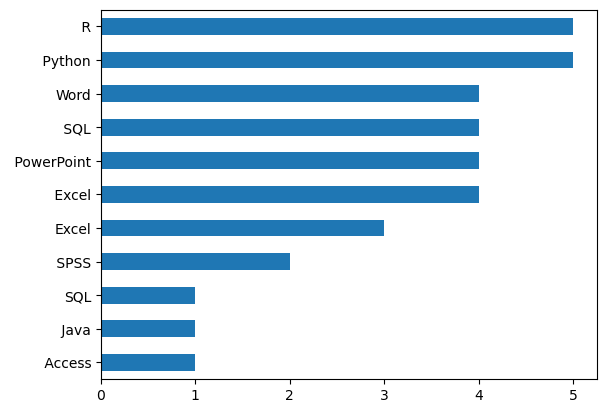

In [38]:
df.loc[:, ' Access':'Word'].sum().sort_values().plot(kind='barh')

### Checkbox

In [39]:
dtemps=[]
dtemps.append(df)
multival_cols=['alpha', 'beta', 'gamma']
for c in multival_cols:
    dtemp=df[c].str.get_dummies(', ')
    dtemp.columns=[f'{c}_{p}' for p in dtemp.columns]
    dtemps.append(dtemp)
data=pd.concat(dtemps, axis=1)
data

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,...,alpha_ice cream,alpha_tea,beta_bakery,beta_coffee,beta_ice cream,beta_tea,gamma_bakery,gamma_coffee,gamma_ice cream,gamma_tea
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,...,0,0,0,0,0,1,1,0,0,0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",...,1,1,1,1,0,1,0,0,0,1
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream",...,1,1,0,0,1,1,1,1,0,0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery",...,0,1,1,1,0,0,1,0,1,1
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,...,0,1,1,0,0,0,1,1,1,1
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,...,0,0,0,0,0,0,0,0,0,1
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery",...,0,1,1,0,0,1,0,1,1,0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,...,0,1,0,1,0,0,1,1,1,1
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery",...,0,1,1,0,0,1,1,0,0,1
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,...,0,1,0,0,0,1,0,0,0,1


In [40]:
data.loc[:, 'alpha_bakery':'alpha_tea']

,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea
0,0,1,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,0,1,0,1
7,0,0,0,1
8,1,0,0,1
9,0,0,0,1


In [41]:
data[data.columns[data.columns.str.contains('beta')]]

,beta,beta_bakery,beta_coffee,beta_ice cream,beta_tea
0,tea,0,0,0,1
1,"coffee, tea, bakery",1,1,0,1
2,"tea, ice cream",0,0,1,1
3,"coffee, bakery",1,1,0,0
4,bakery,1,0,0,0
5,NaN,0,0,0,0
6,"tea, bakery",1,0,0,1
7,coffee,0,1,0,0
8,"tea, bakery",1,0,0,1
9,tea,0,0,0,1


### 